In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

%matplotlib inline

In [88]:
# train and test datasets
train_csv = pd.read_csv('../input/application_train.csv.zip', compression='infer')
test_csv = pd.read_csv('../input/application_test.csv.zip', compression='infer')

# balance information
credit_card_balance = pd.read_csv('../input/credit_card_balance.csv.zip', compression='infer')
bureau_balance = pd.read_csv('../input/bureau_balance.csv.zip', compression='infer')
cash_balance = pd.read_csv('../input/POS_CASH_balance.csv.zip', compression='infer')

# history data
installments = pd.read_csv('../input/installments_payments.csv.zip', compression='infer')
previous = pd.read_csv('../input/previous_application.csv.zip', compression='infer')

In [89]:
# removing 5 rows
train_csv = train_csv[train_csv['NAME_INCOME_TYPE'] != 'Maternity leave']

# removing 4 rows
train_csv = train_csv[train_csv['NAME_FAMILY_STATUS'] != 'Unknown']

# removing 2 rows
train_csv = train_csv[train_csv['CODE_GENDER'] != 'XNA']

In [90]:
# assigning X,y
X = pd.get_dummies(train_csv.drop('TARGET', axis=1), dummy_na=True)
y = train_csv['TARGET']

# assigning test
test = pd.get_dummies(test_csv, dummy_na=True)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [79]:
gboost_baseline = GradientBoostingClassifier(n_estimators=2000)

In [80]:
gboost_baseline.fit(X_train.fillna(0), y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [81]:
predictions = gboost_baseline.predict(X_test.fillna(0))
pred_prob = gboost_baseline.predict_proba(X_test.fillna(0))

In [82]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     93364
          1       0.55      0.02      0.03      8111

avg / total       0.89      0.92      0.88    101475



In [83]:
print(confusion_matrix(y_test, predictions))

[[93245   119]
 [ 7968   143]]


In [84]:
roc_auc_score(y_test, pred_prob[:,1])

0.752362417940092

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])

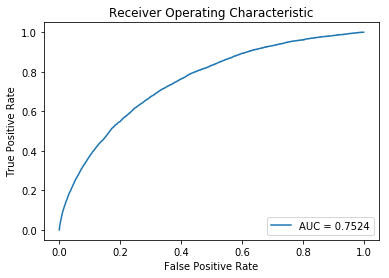

In [86]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, label='AUC = %0.4f'% roc_auc_score(y_test, pred_prob[:,1]))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')

In [25]:
pred_sub = gboost_baseline.predict_proba(test.fillna(0))

submission = pd.DataFrame()
submission['TARGET'] = pred_sub[:,1]
submission.index = test['SK_ID_CURR']

In [26]:
submission.to_csv('gboost-complete-baseline.csv')

In [59]:
summary = pd.Series(gboost_baseline.feature_importances_)
summary.index = X.columns

In [70]:
summary.sort_values(ascending=False, inplace=True)

In [73]:
summary

EXT_SOURCE_3                                0.130086
EXT_SOURCE_2                                0.120691
DAYS_BIRTH                                  0.080033
EXT_SOURCE_1                                0.060527
AMT_GOODS_PRICE                             0.052297
AMT_CREDIT                                  0.051843
DAYS_EMPLOYED                               0.035950
DAYS_ID_PUBLISH                             0.032737
AMT_ANNUITY                                 0.031758
DAYS_REGISTRATION                           0.022041
DAYS_LAST_PHONE_CHANGE                      0.018862
CODE_GENDER_F                               0.012447
OWN_CAR_AGE                                 0.011523
FLAG_OWN_CAR_Y                              0.011499
REGION_RATING_CLIENT_W_CITY                 0.011352
DEF_30_CNT_SOCIAL_CIRCLE                    0.011010
NAME_FAMILY_STATUS_Married                  0.010404
AMT_REQ_CREDIT_BUREAU_QRT                   0.009923
AMT_INCOME_TOTAL                            0.